# Gráficos - Estudos Séries Temporais 

In [1]:
from datetime import datetime
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [5]:
# lendo o arquivo e definindo o index como Time
df = pd.read_csv('italy_earthquakes_from_2016-08-24_to_2016-11-30.csv').set_index('Time')

# tipo dos dados de cada coluna
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [6]:
# Convertendo o index para datetime 
df.index = pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [25]:
# Filtrando e agrupando os dados 

# Criei uma variavel que vai armazenar meu filtro, where(onde) na coluna magnitude os dados forem maior igual a 4.0 e fiz um
# dropna para eliminar todos os dados ausentes das colunas magnitude e depth
depth_magn = df.where((df['Magnitude'] >= 3.0)).dropna()[['Magnitude', 'Depth/Km']]
# agrupando os dados
dm = depth_magn.groupby(depth_magn.index.hour).mean()
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


Text(0.5, 1.0, 'Magnitude VS Profundidade Durante o Dia')

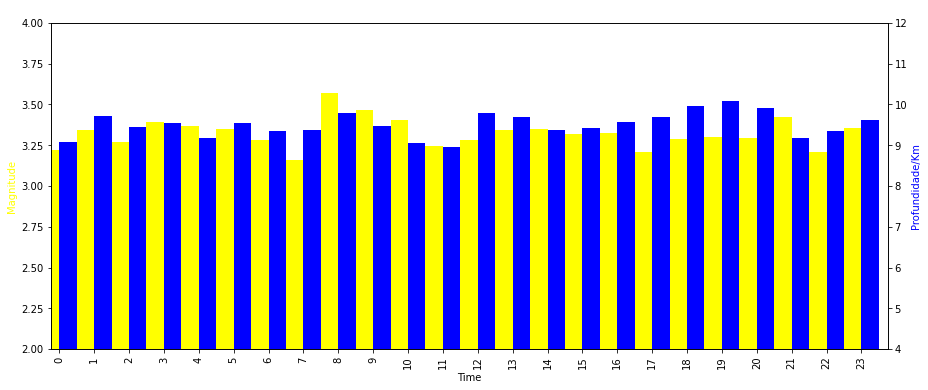

In [26]:
# Criando o gráfico 

# Criando o objeto fig
fig = plt.figure()

# Criando o primeiro eixo do meu gráfico - usando os dados da coluna magnitude e profundidade 
ax = fig.add_subplot(111)
ax.set_ylim([2.0, 4.0]) # definindo o limite dos eixos
ax.set_ylabel('Magnitude') # definindo nome do eixo y
ax.set_xlabel('Hora do dia') # definindo nome do eixo x
ax.yaxis.label.set_color('yellow') # definindo a cor do primeiro grafico

# Criando o segundo grafico
ax2 = ax.twinx() # criando outro conjunto de dados com as mesmas caracteristicas do primeiro
ax2.set_ylim([4.0,12]) # definindo o limite dos eixos
ax2.set_ylabel('Profundidade/Km') # definindo nome do eixo y
ax2.set_xlabel('Hora do dia') # definindo nome do eixo x
ax2.yaxis.label.set_color('blue') # definindo a cor

# Plotando o grafico e definindo as especificações
width = 0.5 # armazendo a largura 
dm['Magnitude'].plot(kind='bar', color='yellow', ax = ax, width=width, position=1)
dm['Depth/Km'].plot(kind='bar', color='blue', ax = ax2, width=width, position=0)
plt.grid(False)
plt.title('Magnitude VS Profundidade Durante o Dia', color='white')